In [1]:
#importing the libraries
import pandas as pd
import numpy as np
c
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#To ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
#reading the dataset
df= pd.read_csv("bankloan.csv")

In [3]:
#printing the top 5 rows of the dataset
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
#type of dataset
type(df)

pandas.core.frame.DataFrame

In [5]:
#datatype of each column
df.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [6]:
#shape of the dataset
df.shape
#from this we can conclude that they are total 17908 rows and 21 columns in our dataset

(17908, 21)

In [7]:
#predicting whether there are any values
df.isnull().sum()
#from this we can conclude that there are no null values in the dataset.

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

# Q1 Will the customer take loan or not? (predcting e.signed)

In [8]:
#counting no.of customers signed for loan and not signed
df.e_signed.value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

In [9]:
#cols and datatypes of given dataset
df.columns,df.dtypes

(Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
        'months_employed', 'years_employed', 'current_address_year',
        'personal_account_m', 'personal_account_y', 'has_debt',
        'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
        'risk_score_4', 'risk_score_5', 'ext_quality_score',
        'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
       dtype='object'),
 entry_id                  int64
 age                       int64
 pay_schedule             object
 home_owner                int64
 income                    int64
 months_employed           int64
 years_employed            int64
 current_address_year      int64
 personal_account_m        int64
 personal_account_y        int64
 has_debt                  int64
 amount_requested          int64
 risk_score                int64
 risk_score_2            float64
 risk_score_3            float64
 risk_score_4            float64
 risk_score_5            float64
 ext_quality

In [10]:
df['pay_schedule'].value_counts().to_dict()

{'bi-weekly': 10716, 'weekly': 3696, 'semi-monthly': 2004, 'monthly': 1492}

In [11]:
#predicting the categorical features in the dataset
cat_feature=[col for col in df.columns if df[col].dtypes=='O']
cat_feature
#from this we can say only pay_schedule is the categorical variable

['pay_schedule']

In [12]:
#non_categorical variables
noncat_feature=[col for col in df.columns if df[col].dtypes!='O']
noncat_feature

['entry_id',
 'age',
 'home_owner',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'e_signed']

In [13]:
#taking the olp variable into variable y
data=df.drop(labels="e_signed",axis=1)
y=df['e_signed']

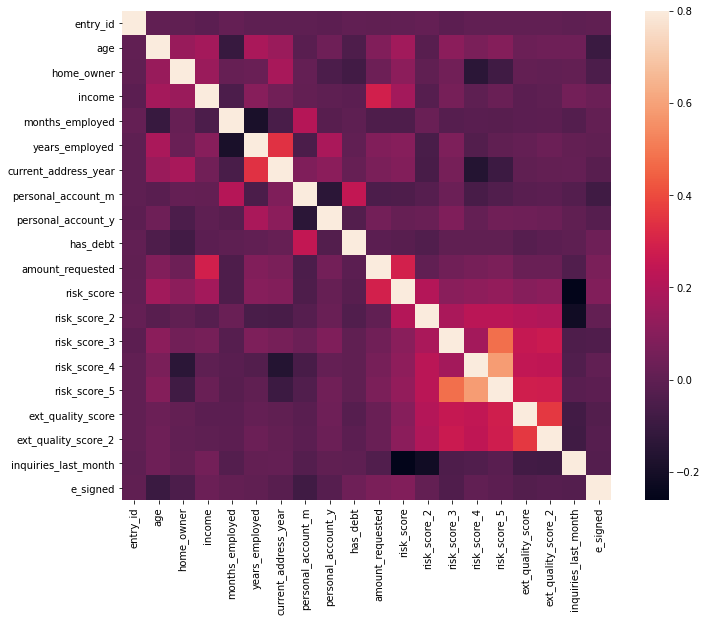

In [14]:
#calcualting the correlation using heatmap
corrmat=df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax =.8, square=True)
plt.show()
#from this we can conclude that every feature is independent and there is no high corelation blw the features

In [15]:
corrmat
#from this you can observe that every feature is independent and doesnt have high corelation with other features

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
entry_id,1.000000,0.004333,0.002528,-0.009034,0.015546,-0.000950,-0.001701,-0.000515,-0.007721,0.007476,0.001720,0.006780,0.013761,-0.005550,0.006963,0.004949,0.006025,0.006392,-0.003492,0.002735
age,0.004333,1.000000,0.142046,0.174062,-0.103635,0.182590,0.146554,-0.013609,0.041332,-0.043808,0.084132,0.162868,-0.019163,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224,-0.096998
home_owner,0.002528,0.142046,1.000000,0.147487,0.018008,0.027367,0.179291,0.013782,-0.047105,-0.076206,0.033996,0.113608,0.000647,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215,-0.047409
income,-0.009034,0.174062,0.147487,1.000000,-0.049157,0.102139,0.046982,0.009052,-0.002002,-0.011199,0.289099,0.168375,-0.023627,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622,0.031377
months_employed,0.015546,-0.103635,0.018008,-0.049157,1.000000,-0.189805,-0.056609,0.211605,-0.019645,-0.000546,-0.044234,-0.044765,0.028950,-0.024297,-0.014512,-0.019406,-0.009041,-0.004461,-0.026710,0.010128
years_employed,-0.000950,0.182590,0.027367,0.102139,-0.189805,1.000000,0.343905,-0.052543,0.184879,0.005293,0.084841,0.098960,-0.056574,0.074659,-0.029398,0.000234,0.014162,0.030353,0.011976,0.003748
current_address_year,-0.001701,0.146554,0.179291,0.046982,-0.056609,0.343905,1.000000,0.082491,0.110258,0.017423,0.067893,0.090535,-0.060412,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659,-0.018969
personal_account_m,-0.000515,-0.013609,0.013782,0.009052,0.211605,-0.052543,0.082491,1.000000,-0.140649,0.246832,-0.046148,-0.044146,-0.023498,0.029162,-0.060695,-0.033960,-0.016151,-0.009181,-0.028225,-0.081195
personal_account_y,-0.007721,0.041332,-0.047105,-0.002002,-0.019645,0.184879,0.110258,-0.140649,1.000000,-0.030701,0.051857,0.017071,0.027535,0.079175,0.012877,0.042121,0.039808,0.029372,0.003923,-0.024160
has_debt,0.007476,-0.043808,-0.076206,-0.011199,-0.000546,0.005293,0.017423,0.246832,-0.030701,1.000000,-0.008445,-0.020332,-0.034691,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007,0.039192


In [16]:
#predicting no.of customers having debts...so that it may help in predicting a new loan
print(df.has_debt[df['has_debt']==0].count(),df.has_debt[df['has_debt']==1].count())

3664 14244


In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
df['pay_schedule']= label_encoder.fit_transform(df['pay_schedule']) 
df['pay_schedule'].unique()

array([0, 3, 2, 1])

In [18]:
df['pay_schedule'].value_counts().to_dict()

{0: 10716, 3: 3696, 2: 2004, 1: 1492}

# ALGORITHM'S


# Spliting up of data

In [19]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
ip=df[['pay_schedule','age','income','home_owner','has_debt','amount_requested','risk_score','risk_score_2','inquiries_last_month']]
op=df[['e_signed']]
X_train,X_test,y_train,y_test=train_test_split(ip,op,random_state=0)

In [20]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((13431, 9), (4477, 9), (13431, 1), (4477, 1))

# Logistic Regression


In [21]:
#as logistic regression is the commonly used classification algorithm where the outcome variable is binary format.
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
pred=lg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_test, pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.34      0.42      2080
           1       0.57      0.75      0.64      2397

    accuracy                           0.56      4477
   macro avg       0.55      0.54      0.53      4477
weighted avg       0.55      0.56      0.54      4477



Confusion Matrix:
[[ 714 1366]
 [ 611 1786]]


# KNN Algorithm

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.55


([<matplotlib.axis.XTick at 0x1ddf1f39100>,
 <a list of 10 Text major ticklabel objects>)

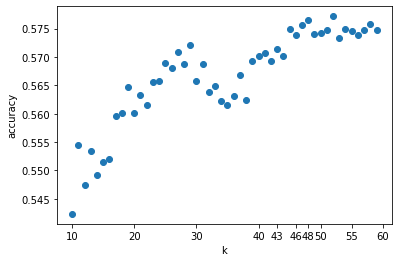

In [22]:
#The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm
#it follows principle where similar things are near to each other.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
k_range = range(10, 60)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([10,20,30,40,43,46,48,50,55,60])

In [23]:
#knn classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
k_pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,k_pred))

[[ 714 1366]
 [ 611 1786]]
              precision    recall  f1-score   support

           0       0.56      0.41      0.47      2080
           1       0.58      0.72      0.65      2397

    accuracy                           0.57      4477
   macro avg       0.57      0.56      0.56      4477
weighted avg       0.57      0.57      0.56      4477



# SVM

In [24]:
#Support Vectors are simply the co-ordinates of individual observation

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
s_pred = svm.predict(X_test)

# Accuracy scores of all algorithms

In [25]:
print("Accuracy scores of each model")
print("LogisticRegression : ",accuracy_score(y_test, pred))
print("Knn                : ",knn.score(X_test, y_test))
print('SVM                : ',svm.score(X_test, y_test))
print()
print("Highest accuracy is for KNN Classifier ")

Accuracy scores of each model
LogisticRegression :  0.5584096493187403
Knn                :  0.5747152110788475
SVM                :  0.5461246370337279

Highest accuracy is for KNN Classifier 


In [26]:
print("Highest accuracy is for KNN Classifier ")

Highest accuracy is for KNN Classifier 


# Q2 Predicting if person has a home or not (predicting homw_owner)

In [27]:
#predicting no.of customers having houses...so that it may help in predicting requested loan amount
print(df.home_owner[df['home_owner']==0].count(),df.home_owner[df['home_owner']==1].count())

10294 7614


In [28]:
#cols and datatypes of given dataset
df.columns,df.dtypes

(Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
        'months_employed', 'years_employed', 'current_address_year',
        'personal_account_m', 'personal_account_y', 'has_debt',
        'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
        'risk_score_4', 'risk_score_5', 'ext_quality_score',
        'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
       dtype='object'),
 entry_id                  int64
 age                       int64
 pay_schedule              int32
 home_owner                int64
 income                    int64
 months_employed           int64
 years_employed            int64
 current_address_year      int64
 personal_account_m        int64
 personal_account_y        int64
 has_debt                  int64
 amount_requested          int64
 risk_score                int64
 risk_score_2            float64
 risk_score_3            float64
 risk_score_4            float64
 risk_score_5            float64
 ext_quality

In [29]:
#taking the old variable into variable y
data=df.drop(labels="home_owner",axis=1)
y=df['home_owner']

In [30]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
df['pay_schedule']= label_encoder.fit_transform(df['pay_schedule']) 
df['pay_schedule'].unique()

array([0, 3, 2, 1], dtype=int64)

In [31]:
df['pay_schedule'].value_counts().to_dict()

{0: 10716, 3: 3696, 2: 2004, 1: 1492}

# ALGORITHM'S

# Spliting up of data

In [32]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
ip=df[['pay_schedule','age','income','has_debt','amount_requested','risk_score','risk_score_2','inquiries_last_month']]
op=df[['home_owner']]
X_train,X_test,y_train,y_test=train_test_split(ip,op,random_state=0)

In [33]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((13431, 8), (4477, 8), (13431, 1), (4477, 1))

# Logistic Regression

In [34]:
#as logistic regression is the commonly used classification algorithm where the outcome variable is binary format.
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
pred=lg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_test, pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.93      0.71      2540
           1       0.53      0.10      0.16      1937

    accuracy                           0.57      4477
   macro avg       0.55      0.51      0.44      4477
weighted avg       0.55      0.57      0.47      4477



Confusion Matrix:
[[2373  167]
 [1752  185]]


# KNN Algorithm

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.56


([<matplotlib.axis.XTick at 0x1ddf2f90dc0>,
 <a list of 10 Text major ticklabel objects>)

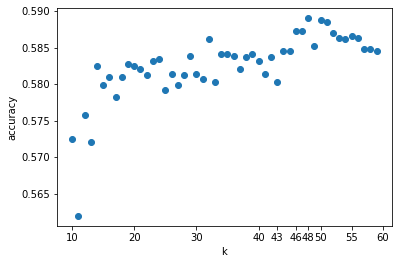

In [35]:
#The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm
#it follows principle where similar things are near to each other.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
k_range = range(10, 60)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([10,20,30,40,43,46,48,50,55,60])

# SVM

In [36]:
#Support Vectors are simply the co-ordinates of individual observation

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
s_pred = svm.predict(X_test)

# Accuracy scores of all algorithms

In [37]:
print("Accuracy scores of each model")
print("LogisticRegression : ",accuracy_score(y_test, pred))
print("Knn                : ",knn.score(X_test, y_test))
print('SVM                : ',svm.score(X_test, y_test))
print()
print("Highest accuracy is for SVM Classifier ")

Accuracy scores of each model
LogisticRegression :  0.571364753182935
Knn                :  0.5845432209068573
SVM                :  0.5872235872235873

Highest accuracy is for SVM Classifier 
